# Data Description:

Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Murder -- Muder rates in different places of United States Assualt- Assualt rate in different places of United States UrbanPop - urban population in different places of United States Rape - Rape rate in different places of United States

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("crime_data.csv",index_col=[0])
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [5]:
df.shape

(50, 4)

In [6]:
# Normalize heterogenous numerical data using standard scalar fit transform to dataset
df_norm=StandardScaler().fit_transform(df)
df_norm

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [7]:
# DBSCAN Clustering
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(df_norm)

DBSCAN(eps=1, min_samples=4)

In [8]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [9]:
# Adding clusters to dataset
df['clusters']=dbscan.labels_
df

,Murder,Assault,UrbanPop,Rape,clusters
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,-1
Arizona,8.1,294,80,31.0,-1
Arkansas,8.8,190,50,19.5,-1
California,9.0,276,91,40.6,-1
Colorado,7.9,204,78,38.7,-1
Connecticut,3.3,110,77,11.1,1
Delaware,5.9,238,72,15.8,-1
Florida,15.4,335,80,31.9,-1
Georgia,17.4,211,60,25.8,-1


In [10]:
df.groupby('clusters').agg(['mean']).reset_index()

,clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,11.005556,247.166667,70.666667,28.766667
1,0,14.050000,238.000000,57.750000,23.200000
2,1,4.825000,112.035714,63.357143,16.107143


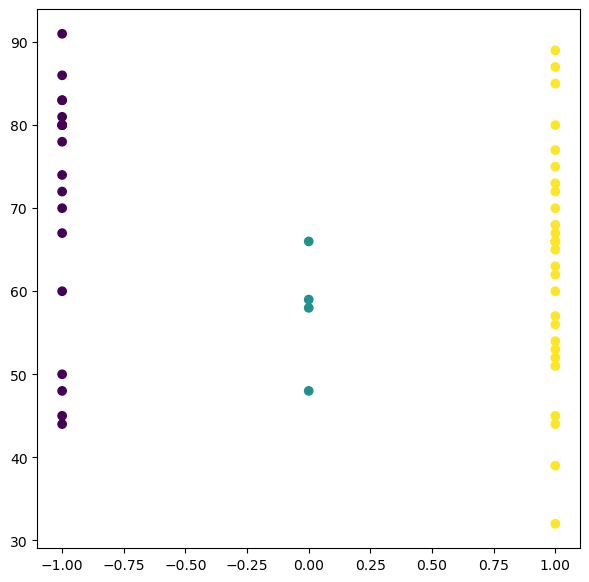

In [14]:
# Plot Clusters
plt.figure(figsize=(7, 7))  
plt.scatter(df['clusters'],df['UrbanPop'], c=dbscan.labels_) 